# Course 12-752: Term Project

## Project Title: Comparison of the accuracy of linear regression model based on the granularity of data: Scaife Hall

### Team Members
1. Rushil Desai     (Andrew ID: rushid)
2. Varun Deshpande  (Andrew ID: varund)
3. Sakshi Mishra    (Andrew ID: sakshimi)

### Section 1: Importing general modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.spatial.distance as dist
%matplotlib inline

### Section 2: Loading the Power Data

> Imported Glob module to accecss all CSV data files in the folder. Load one file at a time and concatenate to a dataframe variable 'frame'

In [3]:
import glob
allFiles = glob.glob('4months' + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)
frame.reset_index(drop=True)
frame = frame.iloc[:,(5,4,2,11)]

### Section 3: Conditioning, subsetting and grouping power data

> Select only those rows within 'frame' which have lights in the Branch Name. Store these rows in a new dataframe called 'power'

In [14]:
scheck = lambda d: 'Lights' in d or 'Light' in d or 'Lts' in d
S_ind = list(map(scheck,frame.BranchName))
power = frame[S_ind].reset_index(drop=True)

> Display variable power: It has 4 column - dates, panel names, branch name and average wattage

In [18]:
power

,DateStamp,PanelName,BranchName,AvgWatt
0,2015-01-15 00:00:00,3rd Floor Ladies' Room,"Lts. Rm 305, 307",0
1,2015-01-15 00:00:00,3rd Floor Ladies' Room,"Lts. Rm 304, 306 & Hall",0
2,2015-01-15 00:00:00,3rd Floor Ladies' Room,"Lts. 312, 313",132
3,2015-01-15 00:00:00,3rd Floor Ladies' Room,Lts. Rm 318,0
4,2015-01-15 00:00:00,3rd Floor Ladies' Room,"Lts. 314, 315",24
5,2015-01-15 00:00:00,3rd Floor Ladies' Room,Lts. Rm 301,0
6,2015-01-15 00:00:00,3rd Floor Ladies' Room,Lts Rm 316,0
7,2015-01-15 00:00:00,3rd Floor Ladies' Room,Lts Rm 303,0
8,2015-01-15 00:00:00,3rd Floor Ladies' Room,Lts. Women's Rest Rm.,0
9,2015-01-15 00:00:00,3rd Floor Ladies' Room,Lts. Cor. 319,0


> Use parser function from dateutil module to convert the timestamps in power from a string to a datetime - Timestamp object

In [16]:
from dateutil import parser
power.DateStamp = power.DateStamp.apply(parser.parse)


> Select 15 minute time interval data and re-store in power

In [17]:
intervals = lambda d: (d.time().minute)%15 == 0 
indexes_15 = list(map(intervals,power.DateStamp))
power = power[indexes_15].reset_index(drop=True)

> Use group by function of Pandas dataframe to group the power data based on 

> 1. Datestamp (P_Total)
> 2. Datestamp & Panel Name (P_Panel)

In [19]:
P_Total = power.groupby(['DateStamp'], as_index=False)
P_Panel = power.groupby(['DateStamp','PanelName'],as_index=False)


> Use .sum() attribute of group object to sum up the Average power based on the group variables defined above

> Create grouped data for first & second set of group variables and call it Lighting_Total and Lighting_Panel respectively

In [69]:
Lighting_Panel = P_Panel.sum()
Lighting_Panel.columns = ['Timestamp','PanelName','AvgPower']
Lighting_Panel

,Timestamp,PanelName,AvgPower
0,2015-01-15 00:00:00,3rd Floor Ladies' Room,489
1,2015-01-15 00:00:00,4th Floor Men's Room,168
2,2015-01-15 00:00:00,Auditorium 1A,0
3,2015-01-15 00:00:00,Auditorium 1B,0
4,2015-01-15 00:00:00,Dean's Office 2,576
5,2015-01-15 00:00:00,Penthouse 277,2346
6,2015-01-15 00:00:00,Scaife Hall 2F,0
7,2015-01-15 00:15:00,3rd Floor Ladies' Room,408
8,2015-01-15 00:15:00,4th Floor Men's Room,168
9,2015-01-15 00:15:00,Auditorium 1A,0


In [95]:
Lighting_Total = P_Total.sum()
Lighting_Total.columns = ['Timestamp','AvgPower']
Lighting_Total

,Timestamp,AvgPower
0,2015-01-15 00:00:00,3579
1,2015-01-15 00:15:00,4221
2,2015-01-15 00:30:00,3720
3,2015-01-15 00:45:00,3492
4,2015-01-15 01:00:00,3655
5,2015-01-15 01:15:00,3576
6,2015-01-15 01:30:00,3730
7,2015-01-15 01:45:00,3378
8,2015-01-15 02:00:00,3469
9,2015-01-15 02:15:00,3951


> Plot the graph of Total power over time

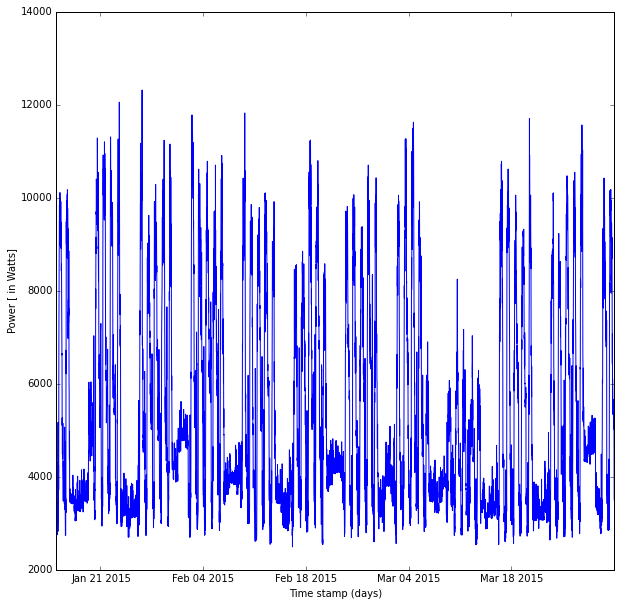

In [96]:
plt.figure(figsize=(10,10))
plt.plot(Lighting_Total.Timestamp,Lighting_Total.AvgPower)
plt.xlabel('Time stamp (days)')
plt.ylabel('Power [ in Watts]')

### Section 4: Linear regression and analysis

> Define function - DesignMatrix which takes only timestamp as an argument and outputs a stack of indentity matrix with number of rows equal to the numer of timestamps and number of columns equal to the number of 15 minute intervals in a week

In [22]:
import math
def DesignMatrix(timestamps):
    tslen = len(timestamps)
    ind = 672
    num = math.ceil(tslen/ind)
    sing = np.identity(ind)
    
    Dmat = np.tile(sing,(num,1))[0:tslen,:]
    
    return Dmat

> Find the Design matrix for the Total lighting consumption

In [97]:
DMX = DesignMatrix(Lighting_Total.Timestamp)

> Define a function 'Beta_hat' which will take a design matrix and a power vector as arguments and outputs the Beta hat values as defined by the function inverse(Xt * X) * Xt * Y where Xt is the transpose of the design matrix and Y is the power vector 

In [24]:
def beta_hat(X,Y): 
    B = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y) 
    return B

> Finding Beta hat for Total lighting consumption and calculating predicted power. Here the data set used for training and testing the regression model is the same.

In [98]:
Act_power = Lighting_Total.AvgPower
B_Lighting = beta_hat(DMX,Actual_power)
Pred_power = np.dot(DMX,B_Lighting)

> Defining function Cal_Rsqr which takes arguments Actual power and Predicted power and then calculates & returns the R squared value

In [99]:
def Cal_Rsqr(Actual_power,Predict_power):
    Power_mean = np.mean(Actual_power)
    Numer = Actual_power - Predict_power
    Denom = Actual_power - Power_mean
    R_sqr = 1- (np.dot(Numer.T,Numer)/np.dot(Denom.T,Denom))
    return R_sqr

> Call function Cal_Rsqr for the total lighting consumption

In [100]:
Cal_Rsqr(Act_power,Pred_power)

0.78928765887872021

### Section 5: Predicting for Lighting consumption for Scaife building using train and test datasets

> Define separate train and test datasets. Here we have used alternate weeeks for train and the remaining alternate for test

> Used the isocalendar function to extract the week number in order to segregate the data

In [101]:
W_check = lambda d : d.isocalendar()[1]%2 == 1 
W_indices = list(map(W_check, Lighting_Total.Timestamp))
Train_Lighting = Lighting_Total[W_indices]
Test_Lighting = Lighting_Total[np.invert(W_indices)]

> Removing the first 4 days of data to allow the train and test datasets to start at the same 15 minute time interval of the week

In [102]:
Train_Lighting = Train_Lighting.iloc[384:,:]

> Generating design matrices for train and test dataset by calling fucntion DesignMatrix

In [103]:
TrainDMX = DesignMatrix(Train_Lighting.Timestamp)
TestDMX = DesignMatrix(Test_Lighting.Timestamp)

> Calculating Beta hat for train data set

In [104]:
LBs = beta_hat(TrainDMX, Train_Lighting.AvgPower)

> Estimate predicted power using beta hat and test matrix. Calculate R square value 

In [105]:
Lighting_predpower = np.dot(TestDMX,LBs)
Lighting_actpower = Test_Lighting.AvgPower
Cal_Rsqr(Lighting_actpower,Lighting_predpower)

0.77797630351169911

> Plot graph of Actual power versus Predicted power with a common time axis

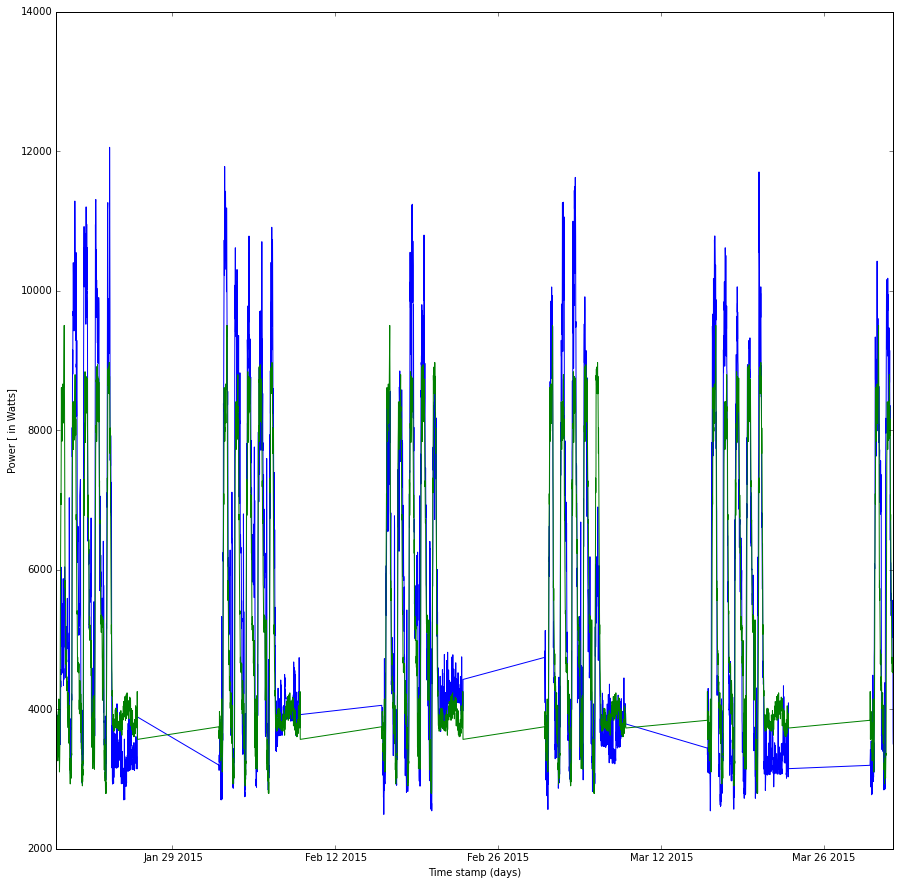

In [107]:
plt.figure(figsize=(15,15))
plt.plot(Test_Lighting.Timestamp,Lighting_actpower,Test_Lighting.Timestamp,Lighting_predpower)
plt.xlabel('Time stamp (days)')
plt.ylabel('Power [ in Watts]')

### Section 6: Predicting for Lighting consumption for different panels of Scaife building using train and test datasets

> The logic for calculating R square value for each of the different panel consumptions in Scaife building is the same as given above. 

> A loop has been created to access the summed up Average power of each panel and the fucntions above have been called in order to calculate R square for each of the panels.

> Provision has been given in the end of the loop to plot predicted and actual power of individual panels.

R square value for prediction on train data for panel 3rd Floor Ladies' Room is 0.276159461651
R square value for prediction on test data for panel 3rd Floor Ladies' Room is 0.000227954885169
R square value for prediction on train data for panel 4th Floor Men's Room is 0.510846667236
R square value for prediction on test data for panel 4th Floor Men's Room is 0.225872287018
R square value for prediction on train data for panel Auditorium 1A is nan
R square value for prediction on test data for panel Auditorium 1A is nan
R square value for prediction on train data for panel Auditorium 1B is nan
R square value for prediction on test data for panel Auditorium 1B is nan
R square value for prediction on train data for panel Dean's Office 2 is 0.370703728658
R square value for prediction on test data for panel Dean's Office 2 is 0.0758048717159
R square value for prediction on train data for panel Penthouse 277 is 0.752271429387
R square value for prediction on test data for panel Penthouse 

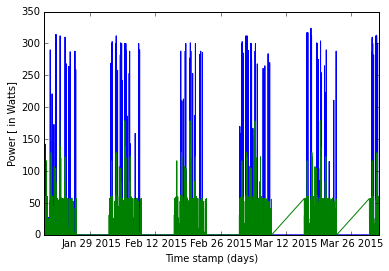

In [123]:

count = 0
for name in (Lighting_Panel.PanelName):
    
    Data = Lighting_Panel[Lighting_Panel.PanelName == name]
    count = count + 1
    W_check = lambda d : d.isocalendar()[1]%2 == 1 
    W_indices = list(map(W_check, Data.Timestamp))
    
    Train_dat = Data[W_indices].iloc[384:,:]
    Test_dat = Data[np.invert(W_indices)]

    TrainDMX = DesignMatrix(Train_dat.Timestamp)
    TestDMX = DesignMatrix(Test_dat.Timestamp)
    
    
    LB = beta_hat(TrainDMX,Train_dat.AvgPower)
    Lighting_actpower = Train_dat.AvgPower
    Lighting_predpower = np.dot(TrainDMX,LB)
    
    R_train_panel = Cal_Rsqr(Lighting_actpower,Lighting_predpower)
    print ('R square value for prediction on train data for panel ' + name + ' is ' + str(R_train_panel))
    
    Lighting_actpower = Test_dat.AvgPower
    Lighting_predpower = np.dot(TestDMX,LB)
    
    R_test_panel = Cal_Rsqr(Lighting_actpower,Lighting_predpower)
    print ('R square value for prediction on test data for panel ' + name + ' is ' + str(R_test_panel))
    
    if (count == 7):
        plt.plot(Test_dat.Timestamp,Lighting_actpower,Test_dat.Timestamp,Lighting_predpower)
        plt.xlabel('Time stamp (days)')
        plt.ylabel('Power [ in Watts]')  
        break;


> End of code